In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from google.colab import files

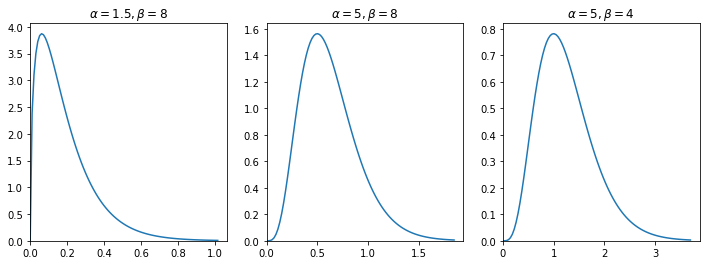

In [0]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,3,1)
a = 1.5
beta = 8
scale = 1/beta
x = np.linspace(gamma.ppf(0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
plt.plot(x, gamma.pdf(x, a, scale=scale),
          label='gamma pdf')
plt.title(r'$\alpha = 1.5, \beta = 8$')
ax1.set_xlim(left=0)
ax1.set_ylim(bottom=0)
#------------------------------------------------------------

ax2 = plt.subplot(1,3,2)

a = 5
beta = 8
scale = 1/beta
x = np.linspace(gamma.ppf(0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
plt.plot(x, gamma.pdf(x, a, scale=scale),
          label='gamma pdf')

plt.title(r'$\alpha = 5, \beta = 8$')
ax2.set_xlim(left=0)
ax2.set_ylim(bottom=0)

#------------------------------------------------------------

ax3 = plt.subplot(1,3,3)
a = 5
beta = 4
scale = 1/beta
x = np.linspace(gamma.ppf(0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
plt.plot(x, gamma.pdf(x, a, scale=scale),
          label='gamma pdf')
plt.title(r'$\alpha = 5, \beta = 4$')
ax3.set_xlim(left=0)
ax3.set_ylim(bottom=0)
#------------------------------------------------------------
plt.savefig('gamma_example.pdf', bbox_inches='tight')
files.download('gamma_example.pdf')
plt.show()

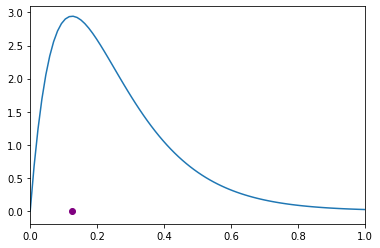

In [0]:
fig, ax = plt.subplots(1, 1)
a = 2
scale = 1/8
center = (a-1)*scale #center = (alpha-1)/beta = (a-1)*scale
x = np.linspace(gamma.ppf(0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
ax.set_xlim(left=0)
ax.plot(x, gamma.pdf(x, a, scale=scale),
          label='gamma pdf')
ax.scatter(center, 0, c='purple')
#ax.set_title('The base distribution')
ax.set_xlim(left=0)
plt.savefig('base.pdf', bbox_inches='tight')
files.download('base.pdf')
plt.show()

In [0]:
'''
gamma.pdf(x, a) = beta**a * x**(a-1) * exp(-beta*x) / gamma(a)
beta = 1./scale
ppf(q, a, loc=0, scale=1)	Percent point function (inverse of cdf — percentiles)
pdf(x, a, loc=0, scale=1)	Probability density function.
'''

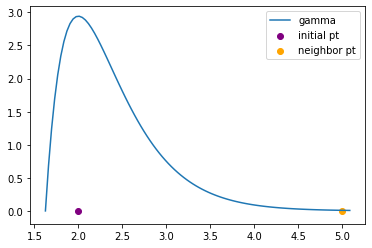

In [0]:
a = 2 #a = alpha
scale = 1/8 #scale = 1/beta
center = (a-1)*scale #center = (alpha-1)/beta = (a-1)*scale


mpl.rcParams['legend.fontsize'] = 10
fig, ax = plt.subplots(1, 1)
t = np.linspace(gamma.ppf(0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
z = gamma.pdf(t, a, scale=scale)

#initial minority point coordinates
x1 = 2
#neighborhood minority point
x2 = 5
#vector
v1 = (x2-x1)

x = x1+(t-center)*v1
ax.plot(x, z, label='gamma')
ax.scatter(x1, 0, c='purple', label='initial pt')
ax.scatter(x2, 0, c='orange', label='neighbor pt')
ax.legend()
#ax.set_title('Minority points on the x-axis')
plt.savefig('2d_demo.pdf', bbox_inches='tight')
files.download('2d_demo.pdf')
plt.show()

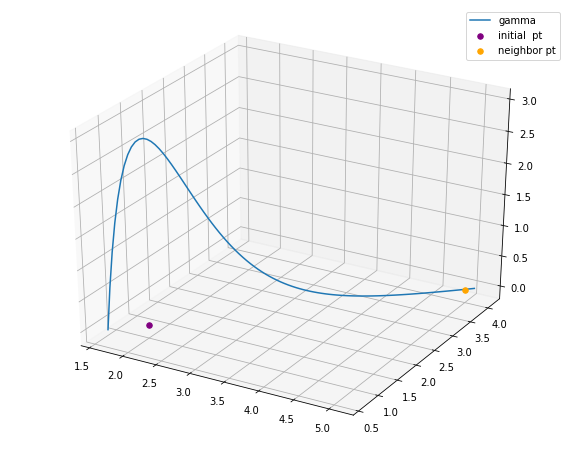

In [0]:
a = 2 #a = alpha
scale = 1/8 #scale = 1/beta
center = (a-1)*scale #center = (alpha-1)/beta = (a-1)*scale


mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
t = np.linspace(gamma.ppf(0.0, a, scale=scale),
              gamma.ppf(0.999, a, scale=scale), 100)
z = gamma.pdf(t, a, scale=scale)

#initial minority point coordinates
x1 = 2
y1 = 1
#neighborhood minority point
x2 = 5
y2 = 4
#vector
v1 = (x2-x1)
v2 = (y2-y1)

x = x1+(t-center)*v1
y = y1+(t-center)*v2
ax.plot(x, y, z, label='gamma')
ax.scatter(x1, y1, 0, c='purple', label='initial  pt', s=30)
ax.scatter(x2, y2, 0, c='orange', label='neighbor pt', s=30)
ax.legend()
#ax.set_title('Minority points on the xy-plane')
plt.savefig('3d_demo.pdf', bbox_inches='tight')
files.download('3d_demo.pdf')
plt.show()

Function to generate new minority points

In [0]:
def gamma_pts(init_pt, neigh_pt, n, base_shape=2, base_scale=1/8):
  #given an initial minority point 'init_pt' and a neighboring point 'neigh_pt'  
  #generates 'n' new minority points based on the base Gamma distribution
  #with parameters 'base_shape'(k) and 'base_scale'(theta)
  new_pts = np.random.gamma(shape=base_shape, scale=base_scale, size=n)
  max_loc = (base_shape-1)*base_scale
  dir_vec = (neigh_pt-init_pt)
  new_pts = init_pt+ (new_pts-max_loc).reshape(-1,1)*dir_vec
  return new_pts

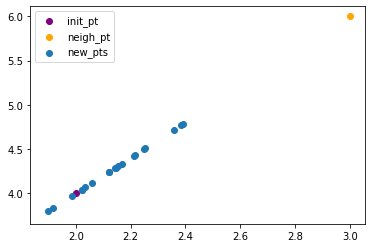

In [0]:
init_pt = np.array([2,4])
neigh_pt = np.array([3,6])
plt.scatter(init_pt[0], init_pt[1], c='purple', label='init_pt')
plt.scatter(neigh_pt[0], neigh_pt[1], c='orange', label='neigh_pt')

n = 20
new_pts = gamma_pts(init_pt, neigh_pt, n)
plt.scatter(new_pts[:,0],new_pts[:,1], label='new_pts')
plt.legend()
plt.show()

In [0]:
2+2

4